In [91]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("../output/current_values.csv", index_col=0)
df_two = pd.read_csv("../output/current_values2.0.csv", index_col=0)



/Users/jsusser/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [97]:
hf = pd.read_csv("../output/Codes/2digit_occupations.csv", index_col=0)
hf = hf.set_index("codes")
hf2 = pd.read_csv("../output/Codes/2digit_occupations(2.0).csv", index_col=0)
hf2 = hf2.set_index("codes")


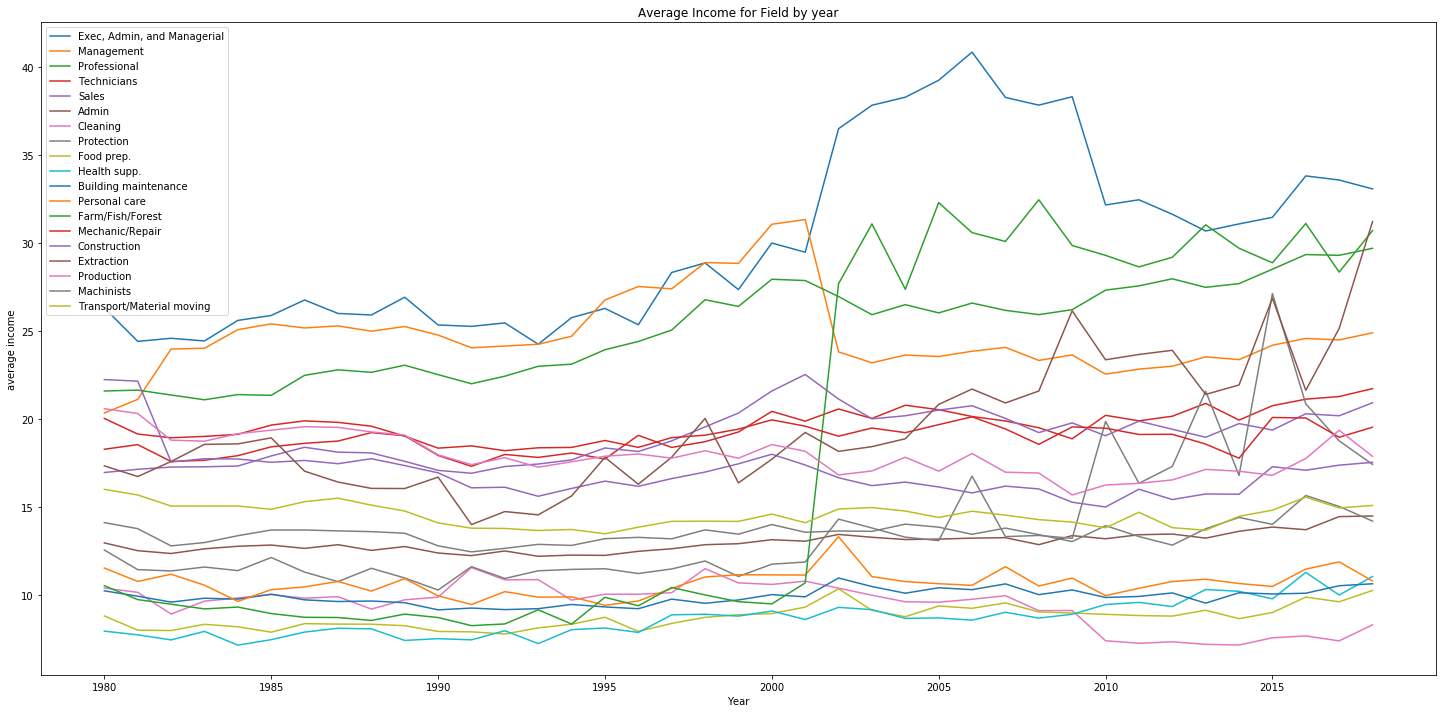

In [79]:
grouped = df.groupby(['2digit occupation', 'Year'])["Wage"].mean().reset_index()
digit = 1
years = []
wages = []
plt.figure(figsize=(25, 12)) 
for x in range(len(grouped)):
    two = grouped.iloc[x][0]
    year = grouped.iloc[x][1]
    wage = grouped.iloc[x][2]
    if digit != two:
        plt.plot(years,wages, label=hf.loc[digit]["occupation"])
        digit = two
        years = []
        wages = []
    years.append(year)
    wages.append(wage)
    
plt.plot(years,wages, label=hf.loc[digit]["occupation"])
plt.xlabel("Year")
plt.ylabel("average income")
plt.title("Average Income for Field by year")
plt.legend()
#plt.savefig('../output/Graphs/mean unweighted by field.png')

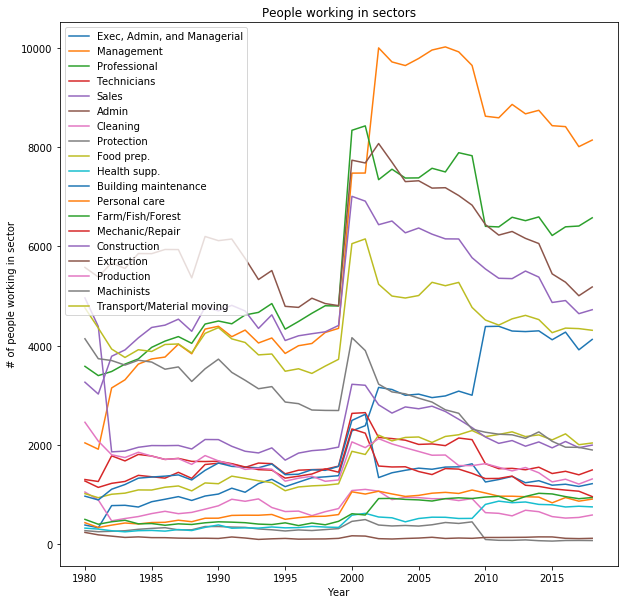

In [80]:
#Year and number of people employed in certain field
years = []
employments = []
digit = 1
grouped = df.groupby(['2digit occupation', 'Year']).count()["3digit occupation"].reset_index()
grouped.columns = ["2digit occupation", "Year", "employment"]
plt.figure(figsize=(10,10))
for x in range(len(grouped)):
    two = grouped.iloc[x][0]
    year = grouped.iloc[x][1]
    employment = grouped.iloc[x][2]
    if digit != two:
        plt.plot(years, employments, label=hf.loc[digit]["occupation"])
        digit = two
        years = []
        employments = []
    years.append(year)
    employments.append(employment)
plt.plot(years, employments, label=hf.loc[digit]["occupation"])
plt.xlabel("Year")
plt.ylabel("# of people working in sector")
plt.title("People working in sectors")
plt.legend()
plt.savefig('../output/Graphs/#of people employed in sectors.png')

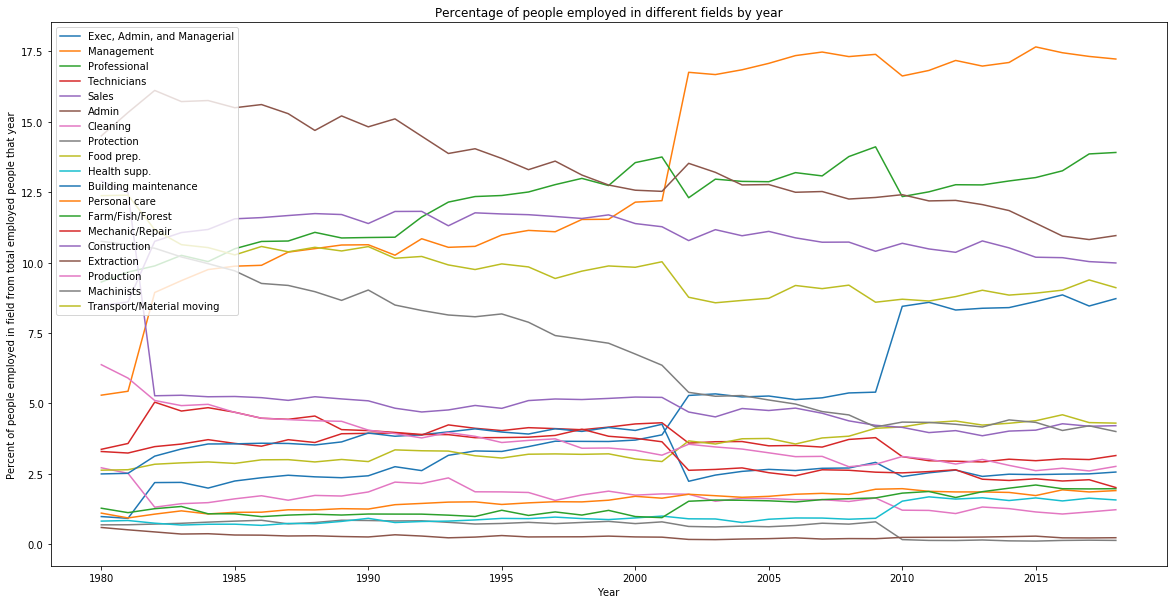

In [81]:
#Year and percent of people employed in certain field out of all of the people working that year
grouped = df.groupby(['2digit occupation', 'Year']).count()["3digit occupation"].reset_index()
grouped.columns = ["2digit occupation", "Year", "employment"]
years_grouped = df.groupby('Year').count()["3digit occupation"].reset_index()
years_grouped = years_grouped.rename(columns={"3digit occupation": "employed_num"})
grouped = pd.merge(grouped, years_grouped, on='Year', how='left')
grouped["employment_percent"] = grouped["employment"] / grouped["employed_num"] * 100
grouped = grouped.drop(columns = ["employment", "employed_num"])
years = []
employments = []
digit = 1
plt.figure(figsize=(20,10))
for x in range(len(grouped)):
    two = grouped.iloc[x][0]
    year = grouped.iloc[x][1]
    employment_percent = grouped.iloc[x][2]
    if digit != two:
        plt.plot(years, employments, label=hf.loc[digit]["occupation"])
        digit = two
        years = []
        employments = []
    years.append(year)
    employments.append(employment_percent)
plt.plot(years, employments, label=hf.loc[digit]["occupation"])
plt.xlabel("Year")
plt.ylabel("Percent of people employed in field from total employed people that year")
plt.title("Percentage of people employed in different fields by year")
plt.legend(loc=2)
plt.savefig('../output/Graphs/percent of people employed in sectors.png')

Text(0.5, 1.0, 'Average Wage by Year')

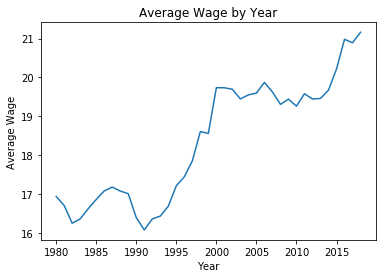

In [82]:
years = []
wages = []
grouped = df.groupby("Year")["Wage"].mean().reset_index()
for x in range(len(grouped)):
    year = grouped.iloc[x][0]
    wage = grouped.iloc[x][1]
    years.append(year)
    wages.append(wage)
plt.plot(years, wages)
plt.xlabel("Year")
plt.ylabel("Average Wage")
plt.title("Average Wage by Year")
#plt.savefig('../output/Graphs/unweighted mean wage.png')

Text(0.5, 1.0, 'Unweighted Wage Variance Yearly')

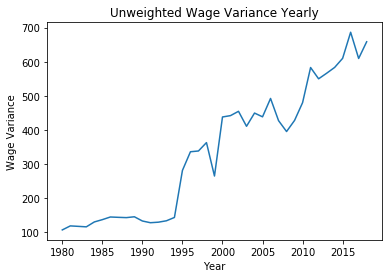

In [41]:
years = []
wages = []
grouped = df.groupby("Year")["Wage"].var().reset_index()
for x in range(len(grouped)):
    year = grouped.iloc[x][0]
    wage = grouped.iloc[x][1]
    years.append(year)
    wages.append(wage)
plt.plot(years, wages)
plt.xlabel("Year")
plt.ylabel("Wage Variance")
plt.title("Unweighted Wage Variance Yearly")
#plt.savefig('../output/Unweighted wage_variance_yearly.png')

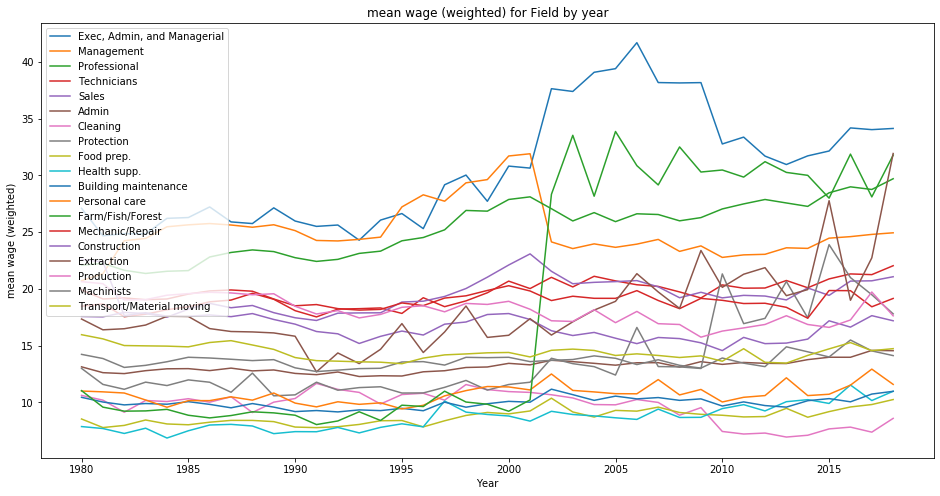

In [83]:
import numpy as np
#make a table with asecwt sums in groups of 2digit occ and year
grouped = df.groupby(['2digit occupation',"Year"]).agg({"Asecwt":"sum"}).reset_index()
#renamed column with sum in the table
grouped = grouped.rename(columns={"Asecwt":"Asecwt_sum"})
#merged table with frame that had the asecwt sum grouped by year and 2digit occ
grouped = pd.merge(df, grouped, on=["Year", "2digit occupation"], how='left')
#created a new column in merged dataframe for each row that created the weighted wage
grouped["Wage"] = grouped["Wage"] *grouped["Asecwt"] / grouped["Asecwt_sum"]
#grouped by 2digit and year, and founded the sum
grouped = grouped.groupby(["2digit occupation","Year"])["Wage"].sum().reset_index()

digit = 1
years = []
wages = []
plt.figure(figsize=[16,8])
#Went through a dataframe grouped by 2 digit occupation, then each year in occupation with weighted wage variance
for x in range(len(grouped)):
    #occupation
    two = grouped.iloc[x][0]
    #year
    year = grouped.iloc[x][1]
    #Wage variance (weighted)
    wage = grouped.iloc[x][2]
    if digit != two:
        #when there is a new occupation, put the line into plot
        plt.plot(years,wages, label=hf.loc[digit]["occupation"])
        digit = two
        years = []
        wages = []
    years.append(year)
    wages.append(wage)
plt.plot(years,wages, label=hf.loc[digit]["occupation"])
plt.xlabel("Year")
plt.ylabel("mean wage (weighted)")
plt.title("mean wage (weighted) for Field by year")
plt.legend(loc=2)
plt.savefig('../output/Graphs/mean wage (weighted) by sector.png')

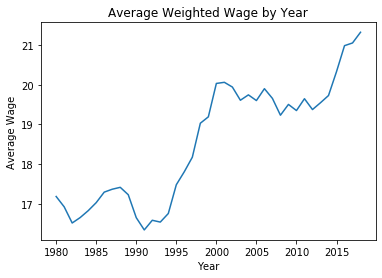

In [84]:
import numpy as np
#make a table with asecwt sums in groups of 2digit occ and year
grouped = df.groupby(["Year"]).agg({"Asecwt":"sum"}).reset_index()
#renamed column with sum in the table
grouped = grouped.rename(columns={"Asecwt":"Asecwt_sum"})
#merged table with frame that had the asecwt sum grouped by year and 2digit occ
grouped = pd.merge(df, grouped, on=["Year"], how='left')
#created a new column in merged dataframe for each row that created the weighted wage
grouped["Wage"] = grouped["Wage"] *grouped["Asecwt"] / grouped["Asecwt_sum"]
#grouped by 2digit and year, and founded the sum
grouped = grouped.groupby(["Year"])["Wage"].sum().reset_index()
years = []
wages = []
for x in range(len(grouped)):
    year = grouped.iloc[x][0]
    wage = grouped.iloc[x][1]
    years.append(year)
    wages.append(wage)
plt.plot(years, wages)
plt.xlabel("Year")
plt.ylabel("Average Wage")
plt.title("Average Weighted Wage by Year")
plt.savefig('../output/Graphs/mean wage (weighted).png')

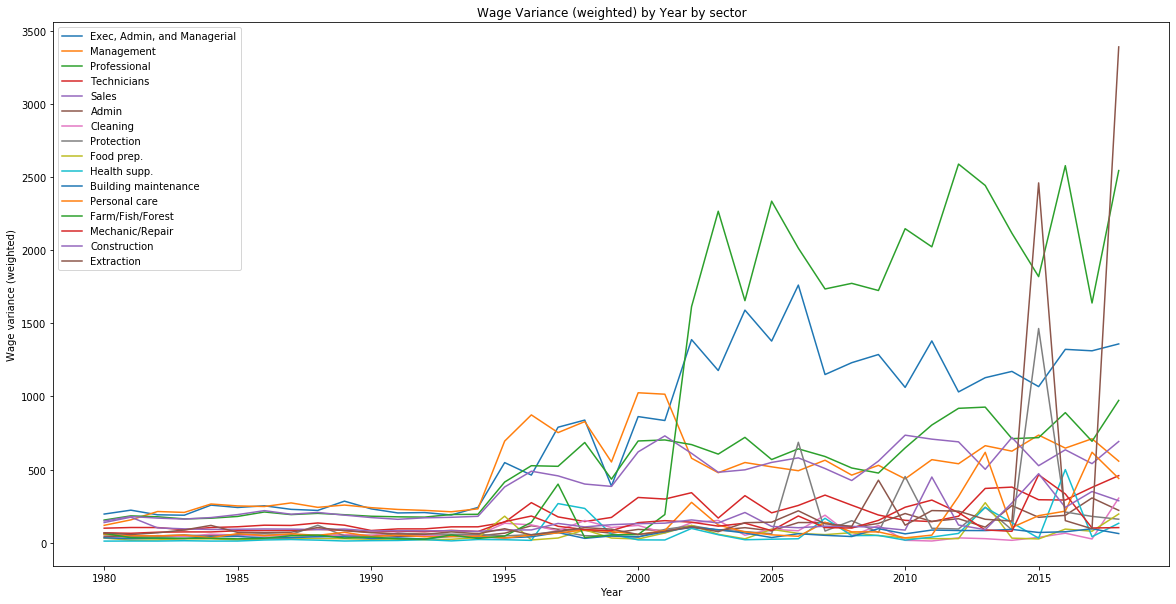

In [85]:
#https://stackoverflow.com/questions/2413522/weighted-standard-deviation-in-numpy
import numpy as np
grouped = df.groupby(['2digit occupation', "Year"])
arrays = []
for x in hf.index.values.tolist()[:-3]:
    for y in df.sort_values(by="Year")["Year"].unique()[:]:
        arrays.append(grouped.get_group((x, y))[["Year", "2digit occupation", "Asecwt", "Wage"]].to_numpy())
plt.figure(figsize=[20,10])
digit = 1.0
years = []
variances = []
for array in arrays:
    values = array[:,-1]
    weights = array[:,-2]
    year = array[0,0]
    two = array[0,1]
    k = array
    average = np.average(values, weights=weights)
    #np.var() only takes one arguement values, also it wont take the weighted average
    variance = np.average((values-average)**2, weights=weights)
    if digit != two:
        plt.plot(years,variances, label=hf.loc[digit]["occupation"])
        digit = two
        years = []
        variances = []
    years.append(year)
    variances.append(variance)

plt.plot(years,variances, label=hf.loc[digit]["occupation"])
plt.legend(loc=2)
plt.xlabel("Year")
plt.ylabel("Wage variance (weighted)")
plt.title("Wage Variance (weighted) by Year by sector")
plt.savefig('../output/Graphs/wage variance (weighted) by sector.png')

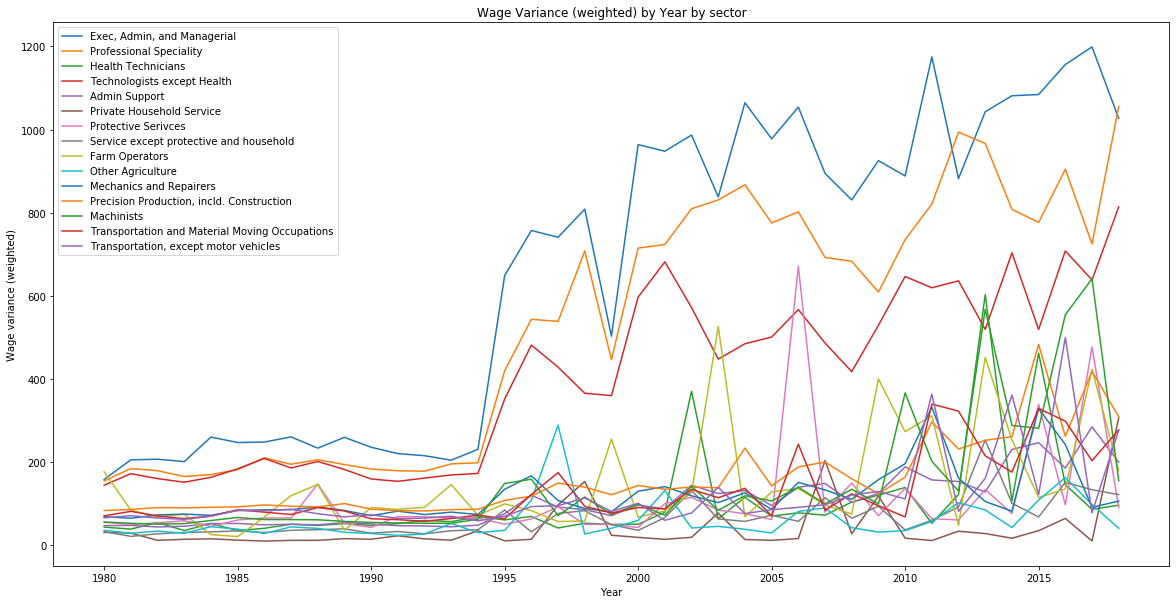

In [98]:
#https://stackoverflow.com/questions/2413522/weighted-standard-deviation-in-numpy
import numpy as np
grouped = df2.groupby(['2digit occupation', "Year"])
arrays = []
for x in hf2.index.values.tolist()[:-3]:
    for y in df.sort_values(by="Year")["Year"].unique()[:]:
        arrays.append(grouped.get_group((x, y))[["Year", "2digit occupation", "Asecwt", "Wage"]].to_numpy())
plt.figure(figsize=[20,10])
digit = 3.0
years = []
variances = []
for array in arrays:
    values = array[:,-1]
    weights = array[:,-2]
    year = array[0,0]
    two = array[0,1]
    k = array
    average = np.average(values, weights=weights)
    #np.var() only takes one arguement values, also it wont take the weighted average
    variance = np.average((values-average)**2, weights=weights)
    if digit != two:
        plt.plot(years,variances, label=hf2.loc[digit]["occupation"])
        digit = two
        years = []
        variances = []
    years.append(year)
    variances.append(variance)

plt.plot(years,variances, label=hf2.loc[digit]["occupation"])
plt.legend(loc=2)
plt.xlabel("Year")
plt.ylabel("Wage variance (weighted)")
plt.title("Wage Variance (weighted) by Year by sector")
plt.savefig('../output/Graphs/wage variance (weighted) by sector.png')

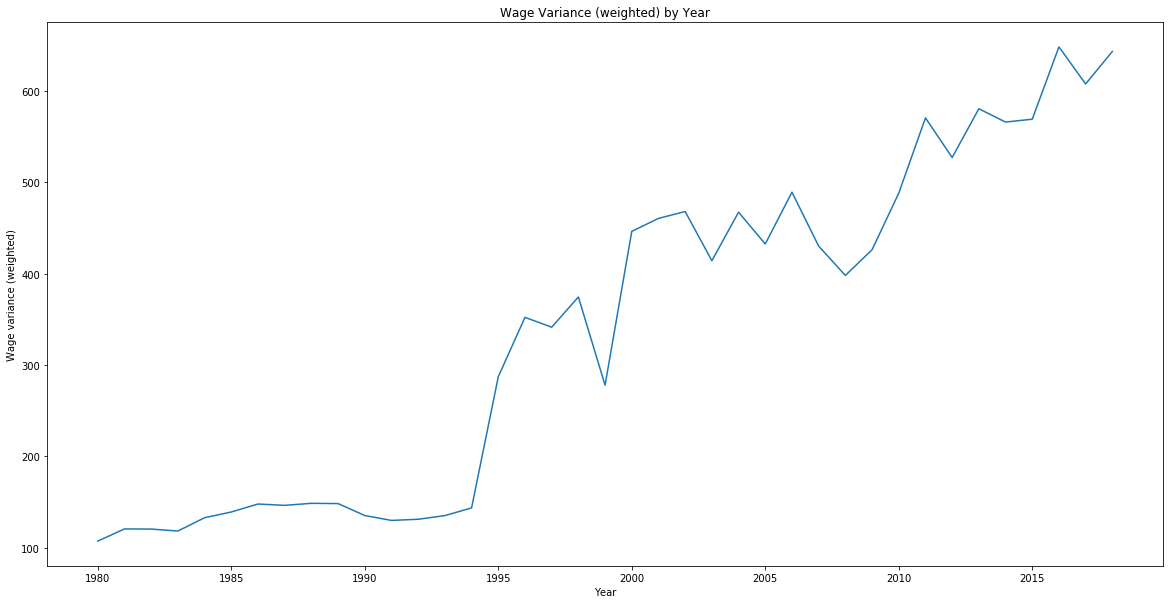

In [86]:
#https://stackoverflow.com/questions/2413522/weighted-standard-deviation-in-numpy
import numpy as np
grouped = df.groupby(["Year"])
arrays = []

for x in df.sort_values(by="Year")["Year"].unique():
    arrays.append(grouped.get_group((x))[["Year", "Asecwt", "Wage"]].to_numpy())

plt.figure(figsize=[20,10])
digit = 3.0
years = []
variances = []
for array in arrays:
    values = array[:,-1]
    weights = array[:,1]
    year = array[0,0]
    average = np.average(values, weights=weights)
    #np.var() only takes one arguement values, also it wont take the weighted average
    variance = np.average((values-average)**2, weights=weights)
    years.append(year)
    variances.append(variance)
plt.plot(years,variances)
plt.xlabel("Year")
plt.ylabel("Wage variance (weighted)")
plt.title("Wage Variance (weighted) by Year")
plt.savefig('../output/Graphs/wage variance (weighted).png')

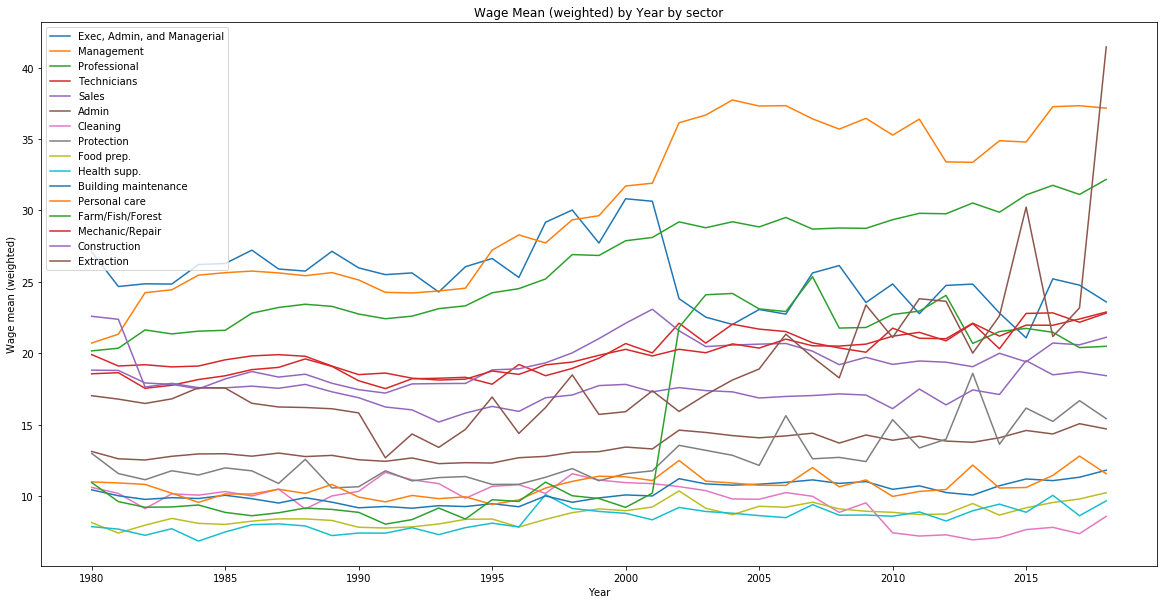

In [77]:
#One way of finding Mean wage (weighted) - ONE LINE
#import numpy One way of finding Mean wage (weighted)
grouped = df.groupby(['2digit occupation', "Year"])
arrays = []
for x in hf.index.values.tolist()[:-3]:
    for y in df.sort_values(by="Year")["Year"].unique():
        arrays.append(grouped.get_group((x, y))[["Year", "2digit occupation", "Asecwt", "Wage"]].to_numpy())
plt.figure(figsize=[20,10])
digit = 1.0
years = []
averages = []
for array in arrays:
    values = array[:,-1]
    weights = array[:,2]
    year = array[0,0]
    two = array[0,1]
    average = np.average(values, weights=weights)
    if digit != two:
        plt.plot(years,averages, label=hf.loc[digit]["occupation"])
        digit = two
        years = []
        averages = []
    years.append(year)
    averages.append(average)
plt.plot(years,averages, label=hf.loc[digit]["occupation"])
plt.legend(loc=2)
plt.xlabel("Year")
plt.ylabel("Wage mean (weighted)")
plt.title("Wage Mean (weighted) by Year by sector")
plt.savefig('../output/Graphs/mean wage (weighted) by sector.png')

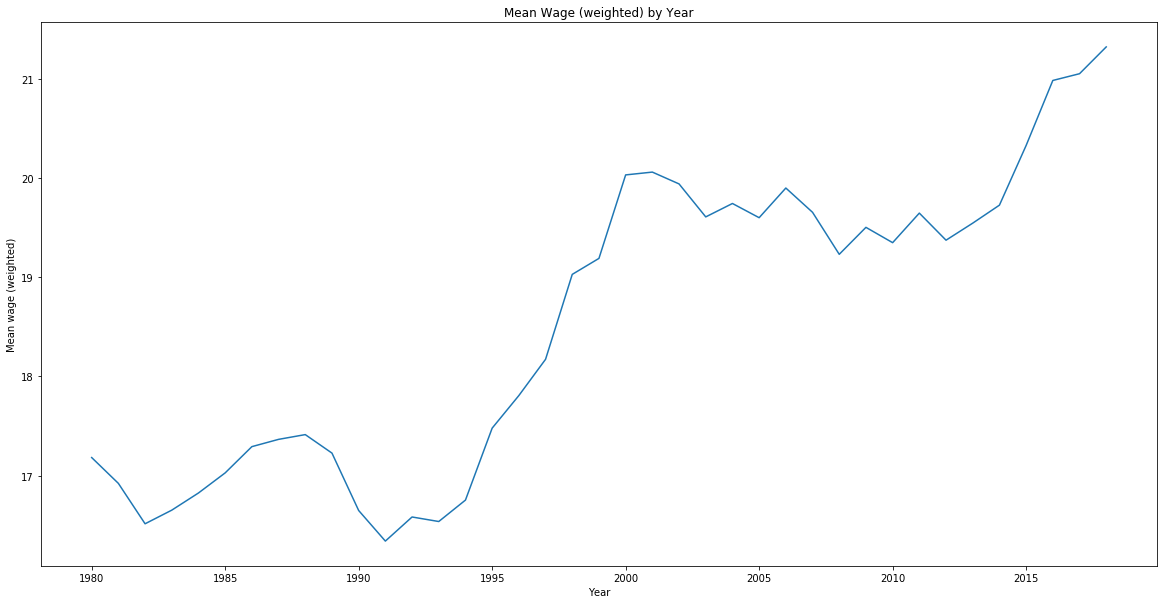

In [87]:
#https://stackoverflow.com/questions/2413522/weighted-standard-deviation-in-numpy
import numpy as np
grouped = df.groupby(["Year"])
arrays = []

for x in df.sort_values(by="Year")["Year"].unique():
    arrays.append(grouped.get_group((x))[["Year", "Asecwt", "Wage"]].to_numpy())

plt.figure(figsize=[20,10])
digit = 3.0
years = []
averages = []
for array in arrays:
    values = array[:,-1]
    weights = array[:,1]
    year = array[0,0]
    average = np.average(values, weights=weights)
    variance = np.average((values-average)**2, weights=weights)
    years.append(year)
    averages.append(average)
plt.plot(years,averages)
plt.xlabel("Year")
plt.ylabel("Mean wage (weighted)")
plt.title("Mean Wage (weighted) by Year")
plt.savefig('../output/Graphs/mean wage (weighted).png')